<span style="font-size:1.5em;"><b>Análisis de bases de datos  
Universidad Nacional de Colombia  
2024-2</b></span>
# <b>Siniestralidad Vial en Bogotá: Análisis de Datos para la Gestión de la Movilidad Segura</b>  

<span style="font-size:0.9em;">Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
David Sebastián Mendoza Cruz - damendozac@unal.edu.co  
David Alejandro Alquichire Rincón - dalquichire@unal.edu.co  
Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
Juan David Bernal Vesga - jubernalv@unal.edu.co</span>

----

La seguridad vial es un tema de vital importancia para la planificación urbana y la protección de la vida en las ciudades. En Bogotá, la Secretaría Distrital de Movilidad (SDM) ha recopilado datos detallados sobre siniestralidad vial desde el año 2007, los cuales incluyen información sobre lesionados, accidentes, causas, tipos de vehículos involucrados y actores viales. Estos datos, disponibles en la plataforma Enterprise de la SDM, representan una oportunidad única para analizar y comprender los patrones de accidentalidad en la ciudad, con el fin de contribuir a la toma de decisiones informadas en materia de seguridad vial.

Este proyecto tiene los siguientes objetivos:
1. Analizar y clasificar los accidentes de tránsito registrados en Bogotá en la plataforma de la secretaria de movilidad desde el 2007, enfocándose en la relación entre tipo de vehículo, actores viales involucrados, localidades afectadas, el estado de los incidentes, etc. Con el fin de identificar patrones clave y proporcionar insumos para la toma de decisiones en materia de seguridad vial.  
2. Proporcionar herramientas visuales que guíen la toma de decisiones en materia de seguridad vial en resultado del análisis estadístico realizado.
3. Determinar tendencias y generar pronósticos que permitan anticipar posibles escenarios de siniestralidad en el futuro, mediante una proyección temporal del comportamiento de los accidentes de tránsito, considerando variables como la frecuencia de muertes y accidentes simples.
Buscamos lo que se expone en los objetivos, pero la idea es usar datos abiertos expuestos en la página de la secretaria de movilidad donde tenemos acceso a los siguientes datos de siniestralidad:
Lesionado, accidentes, causa, vehiculo y actor.



----

### **Manipulación y limpieza de las bases de datos individuales**

La Secretaria de movilidad dispone una base de [datos abiertos](https://datos.movilidadbogota.gov.co/maps/ea243e7de8e846c8bd27e47c08771d66/about) amplia en materia de siniestrialidad en Bogotá la cual ha sido alimentada con datos desde el 2007. En esta sección depuraremos los siguientes data sets:
- __*ACCIDENTE*__: nos brinda información detallada de la cantidad de accidentes que se han registrado en la ciudad de bogotá incluyendo sus coordenadas, la clase de choque, fecha y gravedad. (En este dataset se concentra la mayoria de los datos y es de nuestro interes analizarlo a profundidad).
- __*LESIONADO*__: incluye información de las personas involucrada tales como su condición, genero y edad son los datos mas relevantes. (Sin embargo la descripción y el contenido de la información no resulta de nuestro interes).
- __*ACC_VIA*__: caracteristicas relevantes de cada via donde sucedio el accidente, resulta relevante al relacionar el estado de las vías en la ciudad de Bogotá como posible causante de siniestros en ciertos lugares o localidades.
- __*ACC_VEHICULO*__: información general del tipo de vehiculo y el uso de este ya sea publico o particular.
- __*ACC_CAUSA*__: incluye una breve descripción de una posible causa asociada al siniestro.
- __*ACC_ACTOR*__: nos brinda información relevante de la condición del actor causante del accidente.

In [16]:
# Importamos las librerias necesarias en Python

import pandas as pd 
import seaborn as sb 
import numpy as np 
import matplotlib.pyplot as plt 
import requests
%matplotlib inline

<p>Dado que le daremos prioridad al data set que contiene la información general de accidentes <b>ACCIDENTES.CSV</b> comenzaremos limpiando y manipulando la información de <b>ACC_VEHICULO</b>, <b>ACC_CAUSA</b>, <b>ACC_VIA</b> y <b>ACC_ACTOR_VIAL</b>.<p>

##### __Traemos *ACC_VEHICULO* que corresponde a la información del vehiculo implicado en el accidente mediante un llamado de API__

Traemos la información mediante un llamado a API, sin embargo como los datos se van actualizando diariamente para conservar los resultados guardamos los dataframes como archivos CSV en la carpeta __proy_datasets__ y usamos estos.

In [ ]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/5/query?where=1%3D1&outFields=FORMULARIO,CLASE,SERVICIO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

Datos obtenidos exitosamente


In [ ]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

# Convertir la lista de diccionarios a DataFrame
vehiculo_data = pd.DataFrame(rows)


# Guardamos el data frame como archivo CSV 
vehiculo_data.to_csv("proy_datasets/Vehiculo_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""


In [19]:
vehiculo_data = pd.read_csv("proy_datasets/Vehiculo_data.csv")
vehiculo_data.head(5)


,FORMULARIO,CLASE,SERVICIO
0,A001572817,MOTOCICLETA,PARTICULAR
1,A001572416,MOTOCICLETA,PARTICULAR
2,A001572723,AUTOMOVIL,PARTICULAR
3,A001572723,MOTOCICLETA,PARTICULAR
4,A001572723,CAMIONETA,PUBLICO


In [20]:
# Verificamos si hay valores nulos
vehiculo_data.isna().sum()

FORMULARIO    0
CLASE         0
SERVICIO      0
dtype: int64

In [21]:
# Reemplazamos cadenas vacías o espacios con NaN
vehiculo_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
vehiculo_data.dropna(inplace=True)

# Verficamos que se hayan eliminado correctamente
vehiculo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FORMULARIO  2000 non-null   object
 1   CLASE       2000 non-null   object
 2   SERVICIO    2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos la variedad de clases de vehiculos que se ven involucrados en accidentes al igual que la clasificación de estos según sus servicios.

In [22]:
print(vehiculo_data['CLASE'].value_counts())
print("")
print(vehiculo_data['SERVICIO'].value_counts())

CLASE
MOTOCICLETA        793
AUTOMOVIL          540
BUS                201
CAMIONETA          186
BICICLETA          146
CAMION, FURGON      47
CAMPERO             34
MICROBUS            14
TRACTOCAMION        13
MOTOTRICICLO        12
VOLQUETA             6
BUSETA               6
MOTOCARRO            1
NO IDENTIFICADO      1
Name: count, dtype: int64

SERVICIO
PARTICULAR          1241
PUBLICO              512
 SIN INFORMACION     215
OFICIAL               32
Name: count, dtype: int64


##### __Traemos *ACC_VIA* que corresponde a la información del estado de la via lugar del accidente mediante un llamado de API__

Traemos la información mediante un llamado a API, sin embargo como los datos se van actualizando diariamente para conservar los resultados guardamos los dataframes como archivos CSV en la carpeta __proy_datasets__ y usamos estos.

In [ ]:
"""
# URL de la API
url ="https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/6/query?where=1%3D1&outFields=FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

Datos obtenidos exitosamente


In [ ]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

via_data = pd.DataFrame(rows)
via_data.head(5)

# Guardamos el data frame como archivo CSV 
via_data.to_csv("proy_datasets/Via_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

In [ ]:
via_data = pd.read_csv("proy_datasets/Via_data.csv")
via_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,NO,OPERANDO


In [ ]:
# Revisamos valores nulos 
via_data.isna().sum()

FORMULARIO         0
GEOMETRICA_A       0
GEOMETRICA_B       0
GEOMETRICA_C       0
UTILIZACION        0
CALZADAS           0
CARRILES           0
MATERIAL           0
ESTADO             0
CONDICIONES        0
ILUMINACION_A      0
AGENTE_TRANSITO    0
SEMAFORO           0
dtype: int64

In [ ]:
# Reemplazar cadenas vacías o espacios con NaN
via_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
via_data.dropna(inplace=True)

# Verficamos que se hayan eliminado correctamente
via_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FORMULARIO       2000 non-null   object
 1   GEOMETRICA_A     2000 non-null   object
 2   GEOMETRICA_B     2000 non-null   object
 3   GEOMETRICA_C     2000 non-null   object
 4   UTILIZACION      2000 non-null   object
 5   CALZADAS         2000 non-null   object
 6   CARRILES         2000 non-null   object
 7   MATERIAL         2000 non-null   object
 8   ESTADO           2000 non-null   object
 9   CONDICIONES      2000 non-null   object
 10  ILUMINACION_A    2000 non-null   object
 11  AGENTE_TRANSITO  2000 non-null   object
 12  SEMAFORO         2000 non-null   object
dtypes: object(13)
memory usage: 203.3+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos semaforo -se indica si el semaforo se encontraba operando-, Estado -estado general de la via- Geometrica_A, Geometrica_B, Geometrica_C -descripciones de la via-, utilización -sentidos de funcionamientos-, calzadas, carriles, material de la via, condiciones al momento del accidente, iluminación y la presencia de un agente de transito.

In [ ]:
print(via_data["SEMAFORO"].value_counts())
print("")
print(via_data["ESTADO"].value_counts())
print("")
print(via_data["GEOMETRICA_A"].value_counts())
print(via_data["GEOMETRICA_B"].value_counts())
print(via_data["GEOMETRICA_C"].value_counts())
print("")
print(via_data["UTILIZACION"].value_counts())
print("")
print(via_data["CALZADAS"].value_counts())
print("")
print(via_data["CARRILES"].value_counts())
print("")
print(via_data["MATERIAL"].value_counts())
print("")
print(via_data["CONDICIONES"].value_counts())
print("")
print(via_data["ILUMINACION_A"].value_counts())
print("")
print(via_data["AGENTE_TRANSITO"].value_counts())

SEMAFORO
OPERANDO        1819
NINGUNO          174
APAGADO            3
INTERMITENTE       3
OCULTO             1
Name: count, dtype: int64

ESTADO
BUENO           1969
CON HUECOS        22
PARCHADA           5
HUNDIMIENTOS       3
DERRUMBES          1
Name: count, dtype: int64

GEOMETRICA_A
RECTA    1979
CURVA      21
Name: count, dtype: int64
GEOMETRICA_B
PLANO        1968
PENDIENTE      32
Name: count, dtype: int64
GEOMETRICA_C
CON ANDEN        1216
CON BERMAS        780
BAHIA DE EST.       4
Name: count, dtype: int64

UTILIZACION
UN SENTIDO       1350
DOBLE SENTIDO     641
REVERSIBLE          9
Name: count, dtype: int64

CALZADAS
UNA           1496
DOS            377
TRES O MAS     122
VARIABLE         5
Name: count, dtype: int64

CARRILES
DOS           910
TRES O MAS    706
UNO           367
VARIABLE       17
Name: count, dtype: int64

MATERIAL
ASFALTO      1875
CONCRETO      113
AFIRMADO        9
EMPEDRADO       2
ADOQUIN         1
Name: count, dtype: int64

CONDICIONES
SECA     

Como se puede observar podriamos convertir la información del atributo *AGENTE_Transito* y *ILUMINACION_A* en un tipo de dato númerico binario haciendo uso de dummies.

In [ ]:
# Usamos dummies para la información de la columna ILUMINACION_A
# 1 indica que si habia iluminación en la via y el 0 indica la ausencia de iluminación.
dummies_iluminacion = pd.get_dummies(via_data["ILUMINACION_A"],dtype=int)
via_data = via_data.join(dummies_iluminacion)
via_data.drop("ILUMINACION_A", axis=1, inplace=True)

via_data.drop("SIN", axis=1, inplace=True)
via_data.rename(columns={"CON": "ILUMINACION"}, inplace=True)


# Usamos dummies para la información de la columna AGENTES_TRANSITO
# 1 indica que si habian agentes de transito en la via y el 0 indica la ausencia de estos.
dummies_agentes = pd.get_dummies(via_data["AGENTE_TRANSITO"],dtype=int)
via_data = via_data.join(dummies_agentes)
via_data.drop("AGENTE_TRANSITO", axis=1, inplace=True)

via_data.drop("NO", axis=1, inplace=True)
via_data.rename(columns={"SI": "AGENTE_TRANSITO"}, inplace=True)

via_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,SEMAFORO,ILUMINACION,AGENTE_TRANSITO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,OPERANDO,0,0
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,OPERANDO,0,0
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,OPERANDO,0,0
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,OPERANDO,0,0
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,OPERANDO,1,0


##### __Traemos *ACC_CAUSA* que corresponde a la información de la causa del accidente estipulada en el formulario mediante un llamado de API__

In [ ]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/4/query?where=1%3D1&outFields=FORMULARIO,NOMBRE,TIPO_CAUSA,TIPO&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

Datos obtenidos exitosamente


In [ ]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

causa_data = pd.DataFrame(rows)
causa_data.head(5)

# Guardamos el data frame como archivo CSV 
causa_data.to_csv("proy_datasets/Causa_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

In [ ]:
causa_data = pd.read_csv("proy_datasets/Causa_data.csv")
causa_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,NO,OPERANDO


In [ ]:
causa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FORMULARIO  2000 non-null   object
 1   NOMBRE      2000 non-null   object
 2   TIPO_CAUSA  2000 non-null   object
 3   TIPO        2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos tipos de causa y tipo (de la cual no obtenemos alguna información con respecto a las siglas que representan).

In [ ]:
print(causa_data["TIPO_CAUSA"].value_counts())
print("")
print(causa_data["TIPO"].value_counts())

TIPO_CAUSA
CONDUCTOR    1888
PEATON         87
VEHICULO       11
VIA            11
PASAJERO        3
Name: count, dtype: int64

TIPO
CG    1879
PE      87
VH      11
VI      11
CE       9
PA       3
Name: count, dtype: int64


##### __Traemos *ACC_ACTOR_VIAL* que corresponde a la información general del actor del accidente mediante un llamado de API__

In [ ]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/3/query?where=1%3D1&outFields=FORMULARIO,CONDICION,ESTADO,MUERTE_POSTERIOR,GENERO,EDAD&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

Datos obtenidos exitosamente


In [ ]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

actor_data = pd.DataFrame(rows)
actor_data.head(5)

# Guardamos el data frame como archivo CSV 
actor_data.to_csv("proy_datasets/Actor_data.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

In [ ]:
actor_data = pd.read_csv("proy_datasets/Actor_data.csv")
actor_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,NO,OPERANDO


In [ ]:
# Revisamos valores nulos 
actor_data.isna().sum()

FORMULARIO           0
CONDICION            0
ESTADO              44
MUERTE_POSTERIOR     0
GENERO              61
EDAD                60
dtype: int64

In [ ]:
# Reemplazar cadenas vacías o espacios con NaN
actor_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
actor_data.dropna(inplace=True)

In [ ]:
actor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FORMULARIO        1939 non-null   object 
 1   CONDICION         1939 non-null   object 
 2   ESTADO            1939 non-null   object 
 3   MUERTE_POSTERIOR  1939 non-null   object 
 4   GENERO            1939 non-null   object 
 5   EDAD              1939 non-null   float64
dtypes: float64(1), object(5)
memory usage: 106.0+ KB


El valor en formulario corresponde a un identificador de la información suministrada y a continuación mostramos los posibles valores de los siguientes atributos estado del actor, genero y si el actor murio post accidente.

In [ ]:
print(actor_data["ESTADO"].value_counts())
print("")
print(actor_data["GENERO"].value_counts())
print("")
print(actor_data["MUERTE_POSTERIOR"].value_counts()   )

ESTADO
ILESO     1196
HERIDO     721
MUERTO      22
Name: count, dtype: int64

GENERO
MASCULINO    1585
FEMENINO      354
Name: count, dtype: int64

MUERTE_POSTERIOR
N    1932
S       7
Name: count, dtype: int64


Como se puede observar podriamos convertir la información del atributo *GENERO* y *MUERTE_POSTERIOR* en un tipo de dato númerico binario haciendo uso de dummies.

In [ ]:
# Usamos dummies para la información de la columna GENERO
# 1 indica que el genero es Femenino y el 0 indica Maculino.
dummies_genero = pd.get_dummies(actor_data["GENERO"],dtype=int)
actor_data = actor_data.join(dummies_genero)
actor_data.drop("GENERO", axis=1, inplace=True)

actor_data.drop("MASCULINO", axis=1, inplace=True)
actor_data.rename(columns={"FEMENINO": "GENERO"}, inplace=True)


# Usamos dummies para la información de la columna MUERTE_POSTERIOR
# 1 indica que el actor murio posterior al accidente
# y el 0 indica que el actor vial estuvo vivo durante el accidente.
dummies_muertePosterior = pd.get_dummies(actor_data["MUERTE_POSTERIOR"],dtype=int)
actor_data = actor_data.join(dummies_muertePosterior)
actor_data.drop("MUERTE_POSTERIOR", axis=1, inplace=True)

actor_data.drop("N", axis=1, inplace=True)
actor_data.rename(columns={"S": "MUERTE_POSTERIOR"}, inplace=True)

actor_data.head(5)

,FORMULARIO,CONDICION,ESTADO,EDAD,GENERO,MUERTE_POSTERIOR
0,A001388913,CONDUCTOR,ILESO,50.0,0,0
1,A001387681,CONDUCTOR,ILESO,34.0,0,0
2,A001387681,CONDUCTOR,ILESO,45.0,0,0
3,A001388271,CONDUCTOR,ILESO,34.0,0,0
4,A001388271,CONDUCTOR,ILESO,21.0,0,0


##### __Traemos *ACCIDENTES* que corresponde a la información general del siniestro vial mediante un llamado de API__

Estos data sets nos dan información detallada sobre algunos aspectos involucrados en el accidente. Sin embargo la mayor concentración de información se encuentra en __*ACCIDENTES*__, la cual resulta de nuestro mayor interes en este caso.

In [ ]:
"""
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,LATITUD,LONGITUD&outSR=4326&f=json" 

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")
"""

Datos obtenidos exitosamente


In [ ]:
"""
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

accidentes_data = pd.DataFrame(rows)
accidentes_data.head(5)

# Guardamos el data frame como archivo CSV 
accidentes_data.to_csv("proy_datasets/Accidentes.csv", index=False)  # Guarda el DataFrame en un archivo CSV
"""

In [ ]:
accidentes_data = pd.read_csv("proy_datasets/Accidentes.csv")
accidentes_data.head(5)

,FORMULARIO,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,AGENTE_TRANSITO,SEMAFORO
0,A001030093,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
1,A001030278,RECTA,PLANO,CON BERMAS,DOBLE SENTIDO,UNA,TRES O MAS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
2,A001029417,RECTA,PLANO,CON ANDEN,UN SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
3,A001029417,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,SIN,NO,OPERANDO
4,A001030431,CURVA,PLANO,CON BERMAS,UN SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,NO,OPERANDO


In [ ]:
# Revisamos valores nulos
accidentes_data.isna().sum()

FORMULARIO              0
FECHA_OCURRENCIA_ACC    0
HORA_OCURRENCIA_ACC     0
ANO_OCURRENCIA_ACC      0
MES_OCURRENCIA_ACC      0
DIA_OCURRENCIA_ACC      0
DIRECCION               0
GRAVEDAD                0
CLASE_ACC               0
LOCALIDAD               0
MUNICIPIO               0
LATITUD                 0
LONGITUD                0
dtype: int64

In [ ]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [ ]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FORMULARIO            2000 non-null   object 
 1   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 2   HORA_OCURRENCIA_ACC   2000 non-null   object 
 3   ANO_OCURRENCIA_ACC    2000 non-null   float64
 4   MES_OCURRENCIA_ACC    2000 non-null   object 
 5   DIA_OCURRENCIA_ACC    2000 non-null   object 
 6   DIRECCION             2000 non-null   object 
 7   GRAVEDAD              2000 non-null   object 
 8   CLASE_ACC             2000 non-null   object 
 9   LOCALIDAD             2000 non-null   object 
 10  MUNICIPIO             2000 non-null   object 
 11  LATITUD               2000 non-null   float64
 12  LONGITUD              2000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 203.3+ KB


In [ ]:
# Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) 
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,4.637275,-74.170754


Revisamos el tipo de información de algunos atributos relevantes como la clase de accidentes que corresponde a la clasificación del tipo de accidente y la gravedad del accidente.

In [ ]:
print(accidentes_data['CLASE_ACC'].value_counts())
print("")
print(accidentes_data['GRAVEDAD'].value_counts())

CLASE_ACC
CHOQUE               1530
ATROPELLO             343
CAIDA DE OCUPANTE      69
VOLCAMIENTO            42
OTRO                   15
INCENDIO                1
Name: count, dtype: int64

GRAVEDAD
CON HERIDOS    1479
SOLO DANOS      459
CON MUERTOS      62
Name: count, dtype: int64


----
### __Análisis estadistico basico__

La siguiente grafica nos muestra la clase de vehiculo en el cual suceden mas siniestros y la clase de este ya sea publico, particular, u otro hasta el día de hoy se tiene que la mayoria de siniestros registtrados vienen siendo de motocicletas particulares seguidos por automoviles en su mayoria particulares sin embargo la diferencia sigue siendo abismal entre la cantidad de registrados.

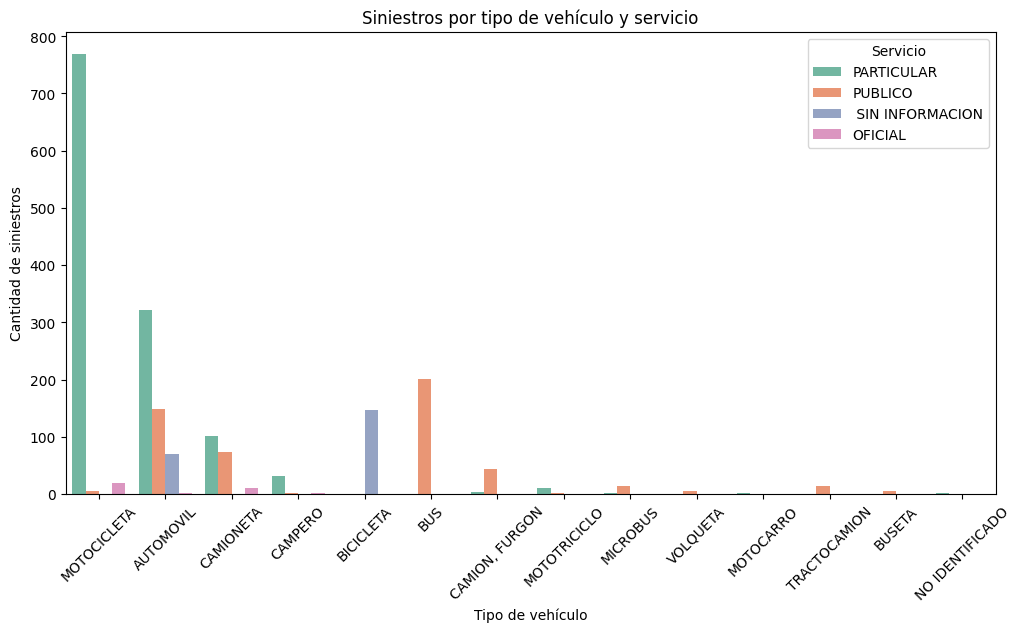

In [32]:
# Gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
sb.countplot(data=vehiculo_data, x='CLASE', hue='SERVICIO', palette='Set2')
plt.title('Siniestros por tipo de vehículo y servicio')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.legend(title='Servicio')
plt.show()

In [34]:
# Unimos los datasets de vehiculo y accidentes para ver la correspondencia entre ellos y tener mas precisión
# Esta información es relevante para realizar un análisis de componentes sin embargo cabe tener en cuenta que la información al no estar completa resulta en bastante perdida.
df_merged = pd.merge(accidentes_data,vehiculo_data, on='FORMULARIO', how='inner')  # 'inner' para conservar solo las filas con FORMULARIO en común

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FORMULARIO            116 non-null    object 
 1   FECHA_OCURRENCIA_ACC  116 non-null    int64  
 2   HORA_OCURRENCIA_ACC   116 non-null    object 
 3   ANO_OCURRENCIA_ACC    116 non-null    float64
 4   MES_OCURRENCIA_ACC    116 non-null    object 
 5   DIA_OCURRENCIA_ACC    116 non-null    object 
 6   DIRECCION             116 non-null    object 
 7   GRAVEDAD              116 non-null    object 
 8   CLASE_ACC             116 non-null    object 
 9   LOCALIDAD             116 non-null    object 
 10  MUNICIPIO             116 non-null    object 
 11  LATITUD               116 non-null    float64
 12  LONGITUD              116 non-null    float64
 13  CLASE                 116 non-null    object 
 14  SERVICIO              116 non-null    object 
dtypes: float64(3), int64(1)

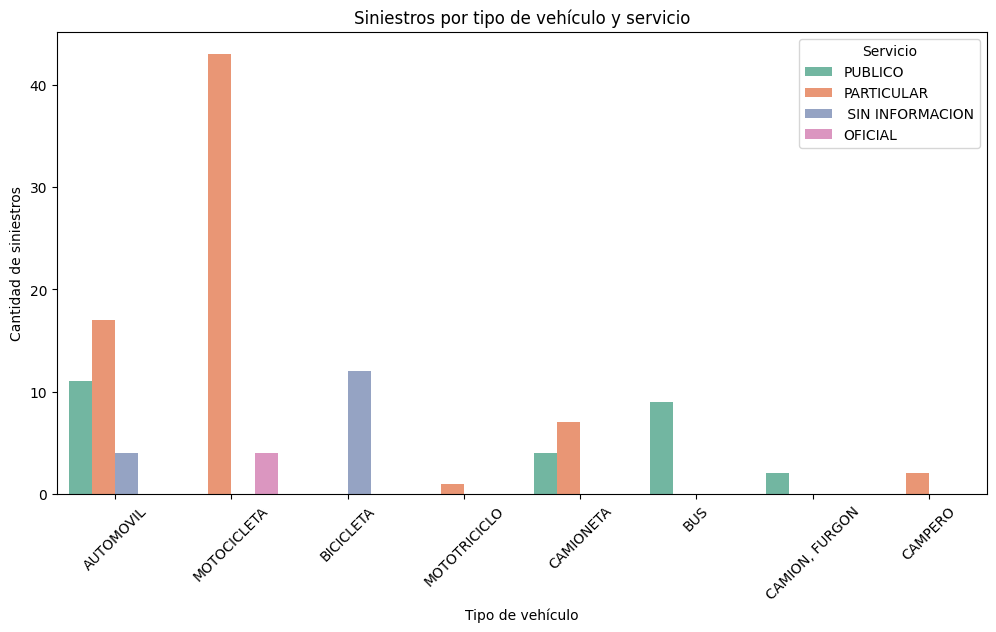

In [35]:
# Gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
sb.countplot(data=df_merged, x='CLASE', hue='SERVICIO', palette='Set2')
plt.title('Siniestros por tipo de vehículo y servicio')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.legend(title='Servicio')
plt.show()